In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model
from models.energy import energy_baseline
from models.energy import energy_LSTM

In [2]:
# Load data
energy = get_energy.get()

  0%|          | 0/263 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 263/263 [00:27<00:00,  9.64it/s]


In [3]:
energy

,gesamt,weekday
date_time,,
2018-12-24 00:00:00,42.02925,0
2018-12-24 01:00:00,39.61025,0
2018-12-24 02:00:00,39.13875,0
2018-12-24 03:00:00,39.42100,0
2018-12-24 04:00:00,40.74775,0
...,...,...
2024-01-05 03:00:00,43.79750,4
2024-01-05 04:00:00,45.13050,4
2024-01-05 05:00:00,47.44100,4


In [4]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
LSTM_model = {
    'name': 'LSTM',
    'function': energy_LSTM.build_and_forecast_lstm
}


Epoch 1/10


2024-01-05 08:51:29.438740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:51:29.439838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:51:29.440550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 2s 885us/step - loss: 1344.4269
Epoch 2/10
1103/1103 [==============================] - 1s 860us/step - loss: 169.4977
Epoch 3/10
1103/1103 [==============================] - 1s 860us/step - loss: 96.7461
Epoch 4/10
1103/1103 [==============================] - 1s 904us/step - loss: 96.0437
Epoch 5/10
1103/1103 [==============================] - 1s 859us/step - loss: 95.9997
Epoch 6/10
1103/1103 [==============================] - 1s 857us/step - loss: 96.0014
Epoch 7/10
1103/1103 [==============================] - 1s 863us/step - loss: 95.9807
Epoch 8/10
1103/1103 [==============================] - 1s 870us/step - loss: 95.9896
Epoch 9/10
1103/1103 [==============================] - 1s 861us/step - loss: 95.9679
Epoch 10/10
1/1 [==============================] - 0s 217ms/step


2024-01-05 08:51:39.989701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:51:39.990486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:51:39.991199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:51:40.482391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:51:40.483434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:51:40.484073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 2s 860us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 855us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 890us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 853us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 852us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 853us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 1ms/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 878us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 847us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 211ms/step


2024-01-05 08:51:51.459453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:51:51.460287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:51:51.461087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:51:51.829108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:51:51.829871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:51:51.830691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 2s 940us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 857us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 858us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 871us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 870us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 866us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 857us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 856us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 857us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 204ms/step


2024-01-05 08:52:02.395545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:02.396595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:02.397274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:02.758217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:02.759299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:02.759996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 2s 864us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 964us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 858us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 887us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 857us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 872us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 853us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 571us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 352ms/step


2024-01-05 08:52:12.585316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:12.585710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:12.586277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:12.872195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:12.872854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:12.873307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 586us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 1ms/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 598us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 136ms/step


2024-01-05 08:52:20.758174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:20.758601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:20.758991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:20.997632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:20.998431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:20.999021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 608us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 614us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 631us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 877us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 130ms/step


2024-01-05 08:52:28.578828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:28.579248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:28.579788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:28.817143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:28.818327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:28.818838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 603us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 350ms/step


2024-01-05 08:52:36.133528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:36.134113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:36.134624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:36.379456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:36.379849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:36.380205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 615us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 619us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 609us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 613us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 608us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 605us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 126ms/step


2024-01-05 08:52:43.606183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:43.607275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:43.607855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:43.829221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:43.829616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:43.830175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 621us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 620us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 128ms/step


2024-01-05 08:52:50.967194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:50.967610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:50.968008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:51.190460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:51.190951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:51.191454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 598us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 349ms/step


2024-01-05 08:52:58.481215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:58.481616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:58.481979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:52:58.727259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:52:58.727947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:52:58.728749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 612us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 605us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 123ms/step


2024-01-05 08:53:05.869639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:05.870068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:05.870440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:06.146548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:06.147096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:06.147777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 127ms/step


2024-01-05 08:53:13.390768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:13.391168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:13.391559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:13.621695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:13.622116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:13.622718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 140ms/step


2024-01-05 08:53:20.719143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:20.719616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:20.720715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:21.212031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:21.212415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:21.212768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 572us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 639us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 627us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 126ms/step


2024-01-05 08:53:28.389017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:28.389448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:28.390020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:28.621055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:28.621652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:28.622294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 610us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 606us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 603us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 598us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 126ms/step


2024-01-05 08:53:35.815772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:35.816259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:35.816796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:36.041821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:36.042435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:36.043010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 609us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 580us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 602us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 127ms/step


2024-01-05 08:53:43.165595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:43.165990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:43.166545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:43.583644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:43.584027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:43.584398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 624us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 585us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 851us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 623us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 626us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 612us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 616us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 602us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 144ms/step


2024-01-05 08:53:51.125956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:51.126366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:51.126800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:51.373062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:51.373471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:51.373963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 129ms/step


2024-01-05 08:53:58.501973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:58.502389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:58.502937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:53:58.730229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:53:58.730952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:53:58.731510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 620us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 640us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 136ms/step


2024-01-05 08:54:05.940276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:05.941059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:05.941483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:06.389247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:06.389673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:06.390043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 598us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 129ms/step


2024-01-05 08:54:13.497480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:13.498142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:13.498528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:13.728306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:13.728723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:13.729426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 614us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 615us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 130ms/step


2024-01-05 08:54:20.890645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:20.891056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:20.891451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:21.139127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:21.139559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:21.139933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 586us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 128ms/step


2024-01-05 08:54:28.223828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:28.224235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:28.224702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:28.679098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:28.679487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:28.680095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 620us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 603us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 582us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 127ms/step


2024-01-05 08:54:35.784245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:35.784694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:35.785131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:36.016875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:36.017542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:36.018055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 582us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 717us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 613us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 578us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 142ms/step


2024-01-05 08:54:43.248568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:43.249082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:43.249513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:43.478925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:43.479336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:43.479705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 839us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 591us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 143ms/step


2024-01-05 08:54:50.925351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:50.925900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:50.926467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:51.393821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:51.394221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:51.394582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 608us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 603us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 608us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 603us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 604us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 599us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 125ms/step


2024-01-05 08:54:58.588155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:58.588612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:58.589144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:54:58.814375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:54:58.814923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:54:58.815429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 637us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 133ms/step


2024-01-05 08:55:06.042829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:06.043329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:06.043893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:55:06.281066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:06.281776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:06.282644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 598us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 592us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 590us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 589us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 127ms/step


2024-01-05 08:55:13.398750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:13.399173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:13.399753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:55:13.830614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:13.830994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:13.831341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 602us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 782us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 633us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 135ms/step


2024-01-05 08:55:21.211267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:21.211784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:21.212241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:55:21.451619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:21.452164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:21.452998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 593us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 603us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 596us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 597us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 601us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 126ms/step


2024-01-05 08:55:28.619694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:28.620093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:28.620506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-01-05 08:55:28.850219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:28.850718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:28.851197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1103/1103 [==============================] - 1s 638us/step - loss: nan
Epoch 2/10
1103/1103 [==============================] - 1s 595us/step - loss: nan
Epoch 3/10
1103/1103 [==============================] - 1s 623us/step - loss: nan
Epoch 4/10
1103/1103 [==============================] - 1s 608us/step - loss: nan
Epoch 5/10
1103/1103 [==============================] - 1s 600us/step - loss: nan
Epoch 6/10
1103/1103 [==============================] - 1s 602us/step - loss: nan
Epoch 7/10
1103/1103 [==============================] - 1s 594us/step - loss: nan
Epoch 8/10
1103/1103 [==============================] - 1s 587us/step - loss: nan
Epoch 9/10
1103/1103 [==============================] - 1s 588us/step - loss: nan
Epoch 10/10
1/1 [==============================] - 0s 132ms/step


2024-01-05 08:55:36.097055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-05 08:55:36.097468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-05 08:55:36.098531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

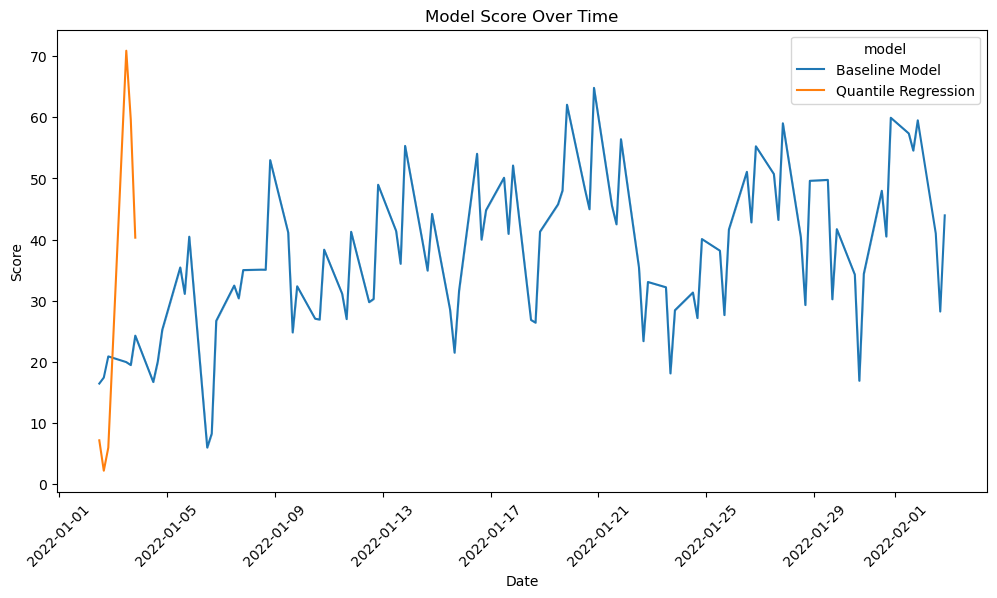

In [5]:
start_date = '2022-01-01'
end_date = '2022-01-31'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model.evaluate(baseline_model, LSTM_model, energy, start_date, end_date, horizon_format="hours")

In [8]:
evaluation_model1.score.mean()

37.314169727822595

In [9]:
evaluation_model2.score.mean()

31.01972270965577